Shivani Verma (40821105)

# LAB 4

# Principal Component Analysis


Using IRIS Dataset

From Scratch

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
# import libraries and iris dataset
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\sem 4\sem 3\FOE(Weekly Homework)\Iris.csv.xls")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Features
X = data.iloc[:,1:5]
#label
Y = data['Species'].to_numpy()
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Step 1:
#STANDARDIZATION
X_stand = StandardScaler().fit_transform(X)
X_stand = pd.DataFrame(X_stand)
X_stand.columns = X.columns
X_stand

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [5]:
#step 2 and 3
#COVARIANCE MATRIX COMPUTATION
#In this step, you will get to know how the variables of the given data are varying with the mean value calculated.(A covariance matrix is a N x N symmetrical matrix)
X_new= X_stand - X_stand.mean()
X_new.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.006711,-0.110103,0.877605,0.823443
SepalWidthCm,-0.110103,1.006711,-0.423338,-0.358937
PetalLengthCm,0.877605,-0.423338,1.006711,0.969219
PetalWidthCm,0.823443,-0.358937,0.969219,1.006711


In [6]:
#step 4
#FEATURE VECTOR
eigenvalues, eigenvectors = eig(X_new.cov())

In [7]:
eigenvalues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [8]:
eigenvectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [9]:
#Step 5
#Sort the eigen values in descending order
sort = np.argsort(eigenvalues)[::-1]
sort_values = eigenvalues[sort]
sort_values


array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [10]:
#sort eigen vectors
sort_vector = eigenvectors[:,sort]
sort_vector

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [11]:
#calculate variance of each feature 
total = sum(eigenvalues)
variance = [(i / total)*100 for i in eigenvalues]
print("variance is:",variance)

variance is: [72.77045209380132, 23.03052326768067, 3.683831957627387, 0.5151926808906194]


In [12]:
#calculate Cumulative Variance:
cumulative_variance = np.cumsum(variance)
print("Cumulative Variance:", cumulative_variance)

Cumulative Variance: [ 72.77045209  95.80097536  99.48480732 100.        ]


In [13]:
# Taking the first 2 vectors (maximum variance)
features=eigenvectors[:2]
features

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481]])

In [14]:
#step 6
#compute new dataset
#steps to compute new daatset
# transpose eigeinvectors : rows are eigenvectors
# transpose the adjusted data (rows are variables and columns are individuals)
# new.data = eigenvectors.transposed X adjustedData.transposed
a = sort_vector[:,0:2]
a

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [15]:
X_1 = np.dot(a.transpose(),X_new.transpose()).transpose()
X_1.shape

(150, 2)

In [16]:
#reduce Dataset
new_data = pd.DataFrame(X_1 , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
new_data = pd.concat([new_data , pd.DataFrame(Y)] , axis = 1)
new_data.head()

,PC1,PC2,0
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


Text(0.5, 1.0, 'Plot')

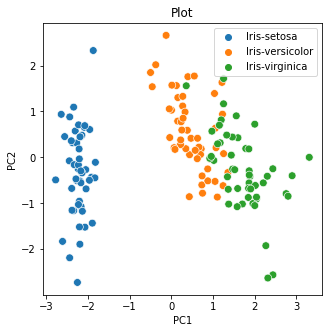

In [17]:
#step 7: Plotting
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = new_data , x = 'PC1',y = 'PC2' ,hue =Y , s = 60)
plt.title('Plot')

From SKlearn

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


In [19]:
pca_reduced = PCA(n_components = 2)
pca_new = pca_reduced.fit_transform(X)
print(pca_reduced.explained_variance_ratio_)

[0.92461621 0.05301557]


In [20]:
#Creating a Pandas DataFrame of reduced Dataset
newsk_df = pd.DataFrame(pca_new , columns = ['PC1','PC2'])
#Concat it with target variable to create a complete Dataset
newsk_df = pd.concat([newsk_df , pd.DataFrame(Y)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

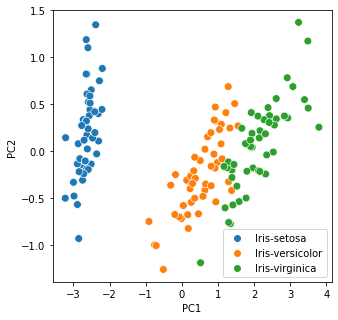

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sb.scatterplot(data = newsk_df , x = 'PC1',y = 'PC2' , hue = Y , s = 60)

<Figure size 576x504 with 0 Axes>

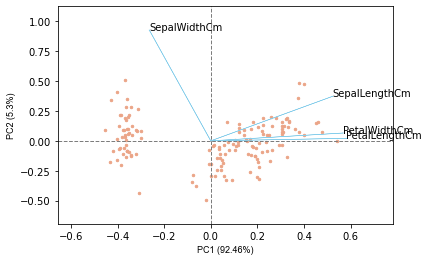

In [22]:
#2D biplot
plt.figure(figsize = (8,7))
pca_out = PCA().fit(X_stand)
pca_score = PCA().fit_transform(X_stand)
loadings = pca_out.components_
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_score, show=True,loadings=loadings,labels=X.columns.values,var1=round(pca_reduced.explained_variance_ratio_[0]*100,2),var2=round(pca_reduced.explained_variance_ratio_[1]*100,2))